In [33]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

#  1. Entendimiento de datos 


In [2]:
import pandas as pd 
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_row', 50)

np.random.seed(3301)

%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
#Ubicación de los datos 
db_location = './Data/OutputDatos2.csv'

In [7]:
#Cargar datos
df_movil= pd.read_csv(db_location, sep=',', encoding = 'ISO-8859-1')

In [8]:
#Dimension de los datos
df_movil.shape

(5121, 9)

In [10]:
#Ver los datos 
display(df_movil.sample(5))
display(df_movil.head(5))
#display(df_movil.tail(5))

,ï»¿titleType,startYear,runtimeMinutes,averageRating,numVotes,region,types,main_genre,secondary_genre
1329,movie,2023,151,"7,4",8895,IN,imdbDisplay,Action,Crime
4519,movie,2011,107,"7,2",4011,CA,imdbDisplay,Comedy,Drama
192,movie,2002,117,"6,7",226349,IN,imdbDisplay,Action,Horror
5063,movie,2018,230,"7,8",7355,CA,imdbDisplay,Drama,No tiene
912,movie,2007,136,"7,4",17099,IN,imdbDisplay,Action,Adventure


,ï»¿titleType,startYear,runtimeMinutes,averageRating,numVotes,region,types,main_genre,secondary_genre
0,movie,1991,137,"8,6",1128166,US,dvd,Action,Sci-Fi
1,movie,2002,150,"8,5",860569,US,imdbDisplay,Biography,Drama
2,movie,2004,120,"7,5",417391,US,imdbDisplay,Action,Crime
3,movie,2005,132,"6,9",5946,US,imdbDisplay,Biography,Drama
4,movie,2013,117,"7,9",502242,US,working,Biography,Drama


# Manipulación de los datos 

In [11]:
df_movil.dtypes

ï»¿titleType       object
startYear           int64
runtimeMinutes      int64
averageRating      object
numVotes            int64
region             object
types              object
main_genre         object
secondary_genre    object
dtype: object

In [12]:
df_movil.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5121 entries, 0 to 5120
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ï»¿titleType     5121 non-null   object
 1   startYear        5121 non-null   int64 
 2   runtimeMinutes   5121 non-null   int64 
 3   averageRating    5121 non-null   object
 4   numVotes         5121 non-null   int64 
 5   region           5121 non-null   object
 6   types            5121 non-null   object
 7   main_genre       5121 non-null   object
 8   secondary_genre  5121 non-null   object
dtypes: int64(3), object(6)
memory usage: 360.2+ KB


In [16]:
df_movil.describe()

,startYear,runtimeMinutes,numVotes
count,5121.000000,5121.000000,5.121000e+03
mean,2012.859402,122.964851,8.773649e+04
std,6.925705,56.565700,1.831364e+05
min,1990.000000,4.000000,1.000000e+01
25%,2008.000000,99.000000,6.667000e+03
50%,2014.000000,112.000000,1.787300e+04
75%,2019.000000,131.000000,7.442700e+04
max,2023.000000,990.000000,2.197234e+06


In [31]:
data_objects = df_movil.select_dtypes(include = ['object']).columns
df_movil[data_objects].describe()

,ï»¿titleType,averageRating,region,types,main_genre,secondary_genre
count,5121,5121,5121,5121,5121,5121
unique,3,30,4,5,19,22
top,movie,"6,7",IN,imdbDisplay,Drama,Drama
freq,4672,398,3596,5055,1322,1672


In [34]:
for o  in data_objects:
    le = LabelEncoder()
    le.fit(df_movil[o])
    df_movil[o] = le.transform(df_movil[o])

In [35]:
df_movil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5121 entries, 0 to 5120
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ï»¿titleType     5121 non-null   int32
 1   startYear        5121 non-null   int64
 2   runtimeMinutes   5121 non-null   int64
 3   averageRating    5121 non-null   int32
 4   numVotes         5121 non-null   int64
 5   region           5121 non-null   int32
 6   types            5121 non-null   int32
 7   main_genre       5121 non-null   int32
 8   secondary_genre  5121 non-null   int32
 9   Cluster          5121 non-null   int64
dtypes: int32(6), int64(4)
memory usage: 280.2 KB


# Modelamiento clustering jerarquico 

In [36]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Selecciona las columnas que deseas utilizar para el clustering
features = ['startYear', 'runtimeMinutes','averageRating','numVotes']
X = df_movil[features]

In [37]:
# Normaliza los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

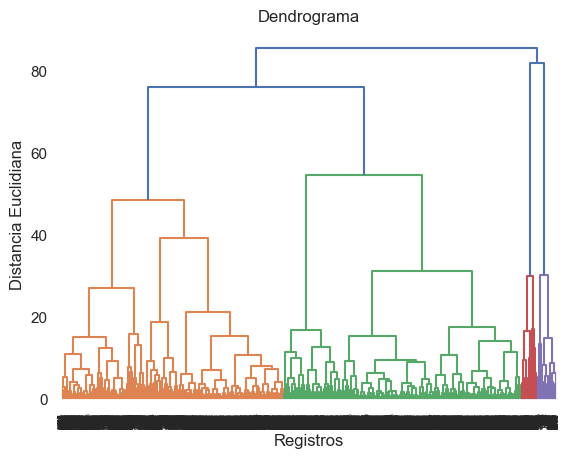

In [38]:

# Usar dendrograma para determinar el número óptimo de clústeres
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Registros')
plt.ylabel('Distancia Euclidiana')
plt.show()


In [48]:
# Basado en el dendrograma, eligimo el número óptimo de clústeres pero no entiendo bien como analizamos el dendrograma
# Luego podemos ir ajustando el modelo de clustering
num_clusters = 4  # Cambia esto según como elegimos a partir del dendrograma

In [40]:
# Ajustamos el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', affinity='euclidean')
clusters = model.fit_predict(X_scaled)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [41]:
# Aniadimos o agregamos la columna de clústeres a los datos originales para que guarden los datos
df_movil['Cluster'] = clusters

In [42]:
# Visualiza los resultados 
for cluster_id in range(num_clusters):
    cluster_data = df_movil[df_movil['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id + 1}: {len(cluster_data)} registros")


Cluster 1: 2452 registros
Cluster 2: 2308 registros
Cluster 3: 164 registros
Cluster 4: 197 registros


In [47]:

import pandas as pd

# Vamos a Filtrar los datos por cluster, vamos a ver los datos estadisticos por cada cluster
cluster_1_data = df_movil[df_movil['Cluster'] == 1]
cluster_2_data = df_movil[df_movil['Cluster'] == 2]
cluster_3_data = df_movil[df_movil['Cluster'] == 3]
cluster_4_data = df_movil[df_movil['Cluster'] == 4]


# Estadísticas descriptivas para el Cluster 1
stats_cluster_1 = cluster_1_data[['startYear', 'runtimeMinutes','averageRating','numVotes']].describe()

# Estadísticas descriptivas para el Cluster 2
stats_cluster_2 = cluster_2_data[['startYear', 'runtimeMinutes','averageRating','numVotes']].describe()

# Estadísticas descriptivas para el Cluster 3
stats_cluster_3 = cluster_3_data[['startYear', 'runtimeMinutes','averageRating','numVotes']].describe()

stats_cluster_4 = cluster_4_data[['startYear', 'runtimeMinutes','averageRating','numVotes']].describe()

# Imprimimos las estadísticas descriptivas para cada cluster
print("Estadísticas descriptivas para el Cluster 1:")
print(stats_cluster_1)
print("\nEstadísticas descriptivas para el Cluster 2:")
print(stats_cluster_2)
print("\nEstadísticas descriptivas para el Cluster 3:")
print(stats_cluster_3)
print("\nEstadísticas descriptivas para el Cluster 4:")
print(stats_cluster_4)



Estadísticas descriptivas para el Cluster 1:
         startYear  runtimeMinutes  averageRating       numVotes
count  2308.000000     2308.000000    2308.000000    2308.000000
mean   2007.511265      113.186742       6.367851   86078.581889
std       5.220691       25.230318       4.730477  124766.539602
min    1990.000000       23.000000       0.000000      32.000000
25%    2004.000000       97.000000       2.000000    8219.000000
50%    2008.000000      108.500000       6.000000   25028.500000
75%    2011.000000      124.000000       9.000000  102406.000000
max    2022.000000      270.000000      25.000000  732151.000000

Estadísticas descriptivas para el Cluster 2:
         startYear  runtimeMinutes  averageRating       numVotes
count   164.000000      164.000000     164.000000     164.000000
mean   2016.914634      369.481707      12.865854   39697.371951
std       6.655781      122.300769       6.889598   62575.473734
min    1990.000000      216.000000       0.000000     639.000000

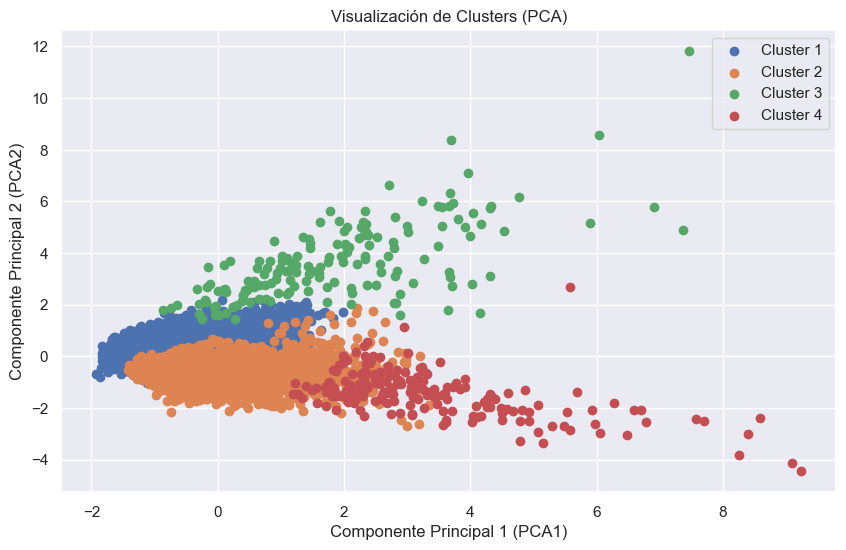

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#### analizando como funciona para ver los clusters





# Reduce la dimensionalidad a 2 dimensiones utilizando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crea un DataFrame con las proyecciones PCA y la etiqueta de cluster
pca_df = pd.DataFrame(data={'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Cluster': clusters})

# Visualiza los clusters en un gráfico de dispersión
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_id + 1}')

plt.title('Visualización de Clusters (PCA)')
plt.xlabel('Componente Principal 1 (PCA1)')
plt.ylabel('Componente Principal 2 (PCA2)')
plt.legend()
plt.show()
